# Flight Data
 ## 1) problem statement

   1. Goal of the Data
   Flight prices fluctuate based on various factors such as airline, time of booking, number of stops, and travel class. Accurately predicting flight prices can help travelers make informed decisions and allow travel companies to offer better dynamic pricing strategies.

   2. Description of Dataset
     The dataset contains 300,153 flight records with information about various domestic flights in India. Each record corresponds to a single flight ticket and includes details that affect flight pricing.
   3. About the Data

 The dataset used in this project is a comprehensive collection of flight ticket information for domestic airlines operating in India. It includes 300,153 entries representing individual flight bookings, providing essential details that influence airfare pricing.



# Data

https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

# Libraries

In [40]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,classification_report
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities
# ------------------------------
# Machine Learning Algorithms - Regression
# ------------------------------
from sklearn.ensemble import GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,RandomForestRegressor,BaggingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# Reading and understanding the data

In [41]:
data=pd.read_csv("/content/flight.csv")
data


,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [43]:
#shape of the data
data.shape

(300153, 12)

In [44]:
#display last n rows
data.tail(10)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300143,300143,Air_India,AI-440,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.42,49,51345
300144,300144,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Business,18.92,49,51345
300145,300145,Air_India,AI-430,Chennai,Morning,one,Morning,Hyderabad,Business,23.08,49,51345
300146,300146,Air_India,AI-440,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.83,49,51345
300147,300147,Air_India,AI-569,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.25,49,68739
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


In [45]:
# display random dataset samples
data.sample(5)

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
118021,118021,Vistara,UK-850,Bangalore,Evening,one,Evening,Chennai,Economy,24.00,31,4672
202623,202623,Vistara,UK-838,Chennai,Night,one,Night,Kolkata,Economy,25.67,49,5937
138128,138128,Vistara,UK-708,Kolkata,Night,one,Morning,Bangalore,Economy,12.25,20,8111
134614,134614,GO_FIRST,G8-512,Kolkata,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.83,44,4499
94217,94217,Vistara,UK-657,Bangalore,Morning,two_or_more,Morning,Mumbai,Economy,23.67,2,17484


### summarized information of columns in dataset

In [46]:
#display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [47]:
#display summary statistics
data.describe()

,Unnamed: 0,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [48]:
data.describe(include=['O']).T

,count,unique,top,freq
airline,300153,6,Vistara,127859
flight,300153,1561,UK-706,3235
source_city,300153,6,Delhi,61343
departure_time,300153,6,Morning,71146
stops,300153,3,one,250863
arrival_time,300153,6,Night,91538
destination_city,300153,6,Mumbai,59097
class,300153,2,Economy,206666


FEATURES

The various features of the cleaned dataset are explained below:

1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.

2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.

3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.

4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.

5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.

6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.

7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.

8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.

9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.

10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.

11) Price: Target variable stores information of the ticket price.

In [49]:
data = data.drop('Unnamed: 0', axis=1)

# Data Visualization of The Features

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


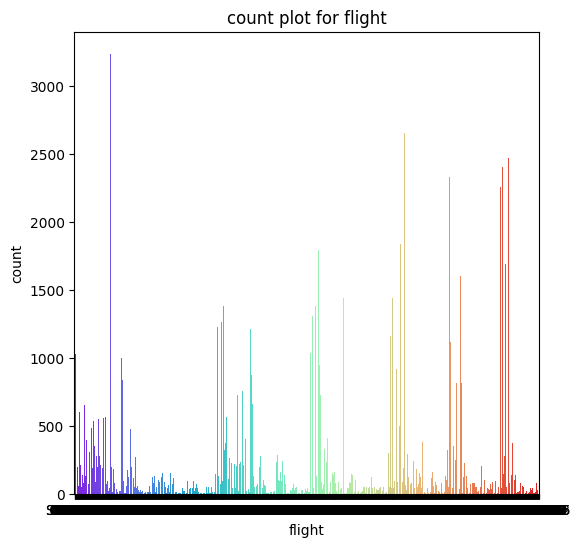

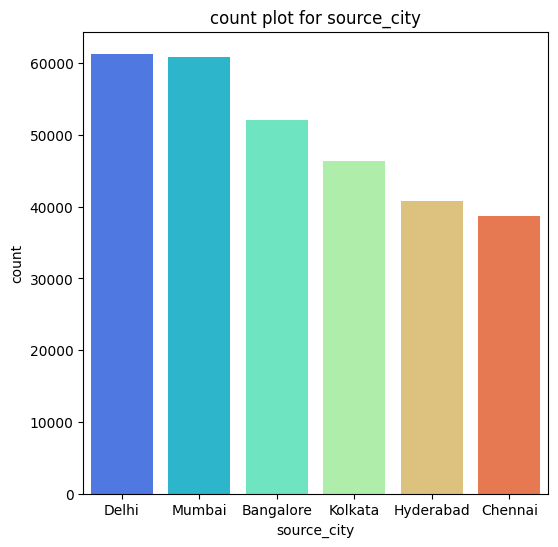

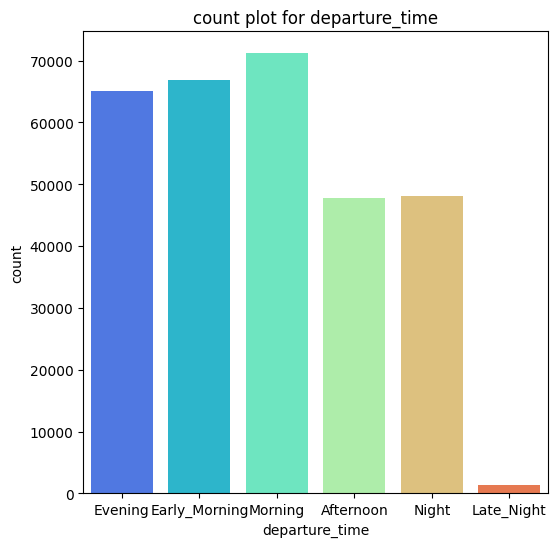

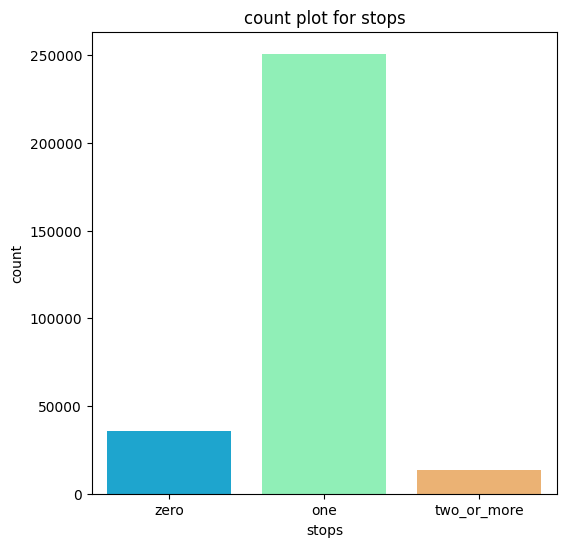

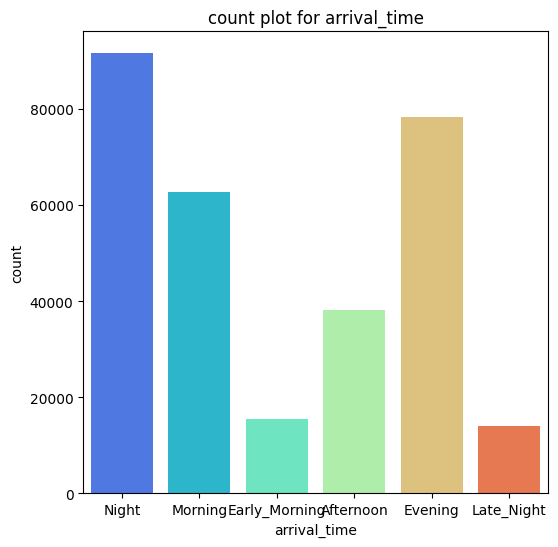

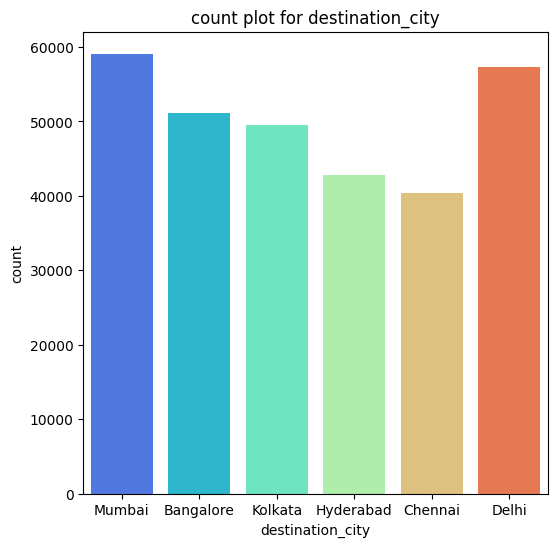

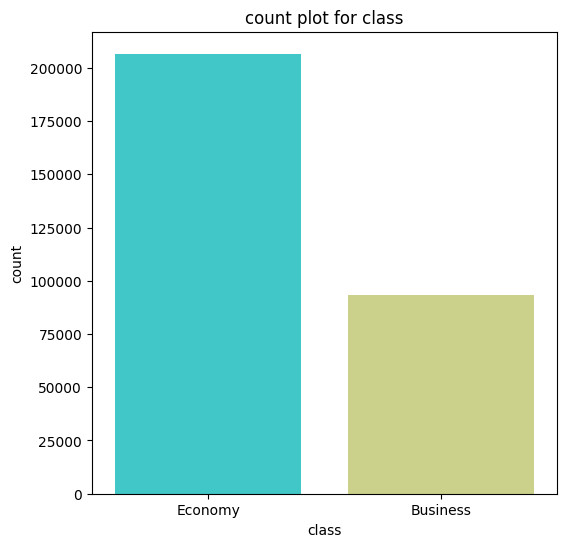

In [51]:
categorical_columns=data.select_dtypes(include=['object','category']).columns.tolist()
for col in categorical_columns[1:]: #skip the first feature
    plt.figure(figsize=(6,6))
    sns.countplot(data=data,x=col,hue=col,palette='rainbow')
    plt.title(f"count plot for {col}")
    plt.show()

📊 Inference:

* The purpose of this code is to visualize the
 distribution of values in each categorical column (except the first one), using count plots.

* Since hue=col is the same as x=col, this doesn’t
 separate the bars into groups — it just colors each bar differently to make the plot more visually appealing.

* This helps you:

 * Understand the frequency of each category in those columns.

  *   Identify any dominant or underrepresented
   categories.

  * Spot potential imbalances in the data which might  affect model performance.



### categerical columns

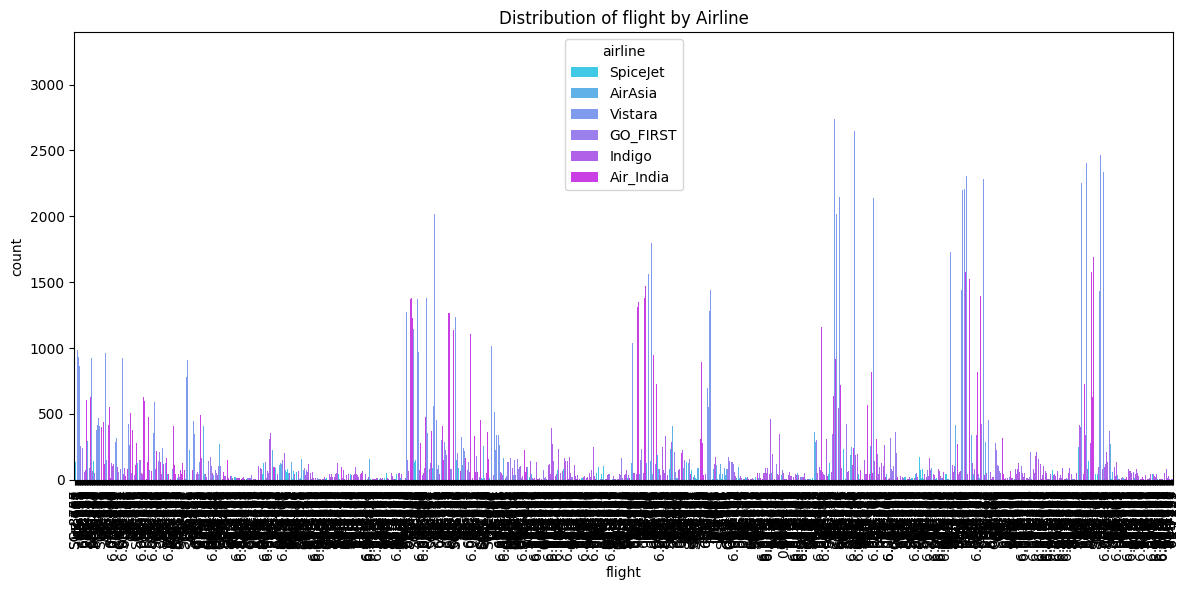

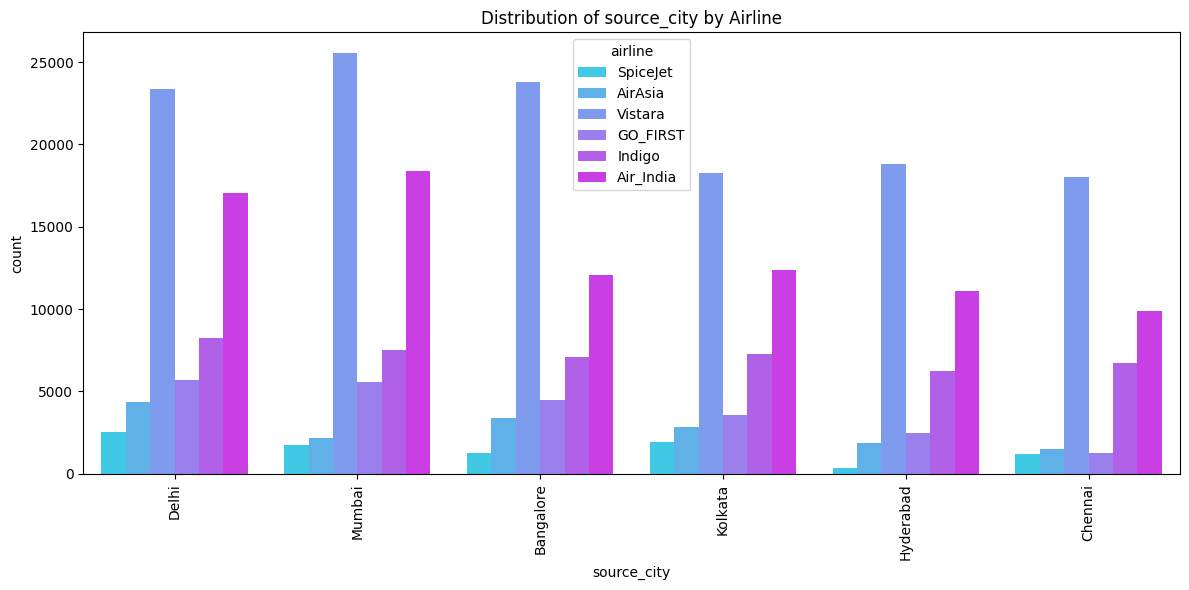

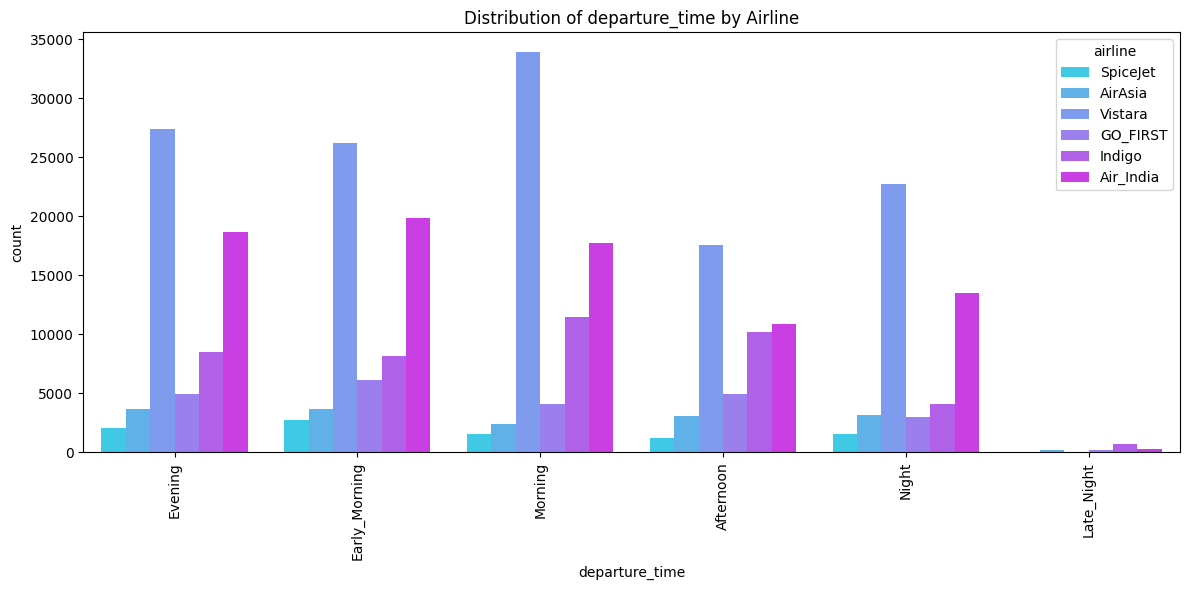

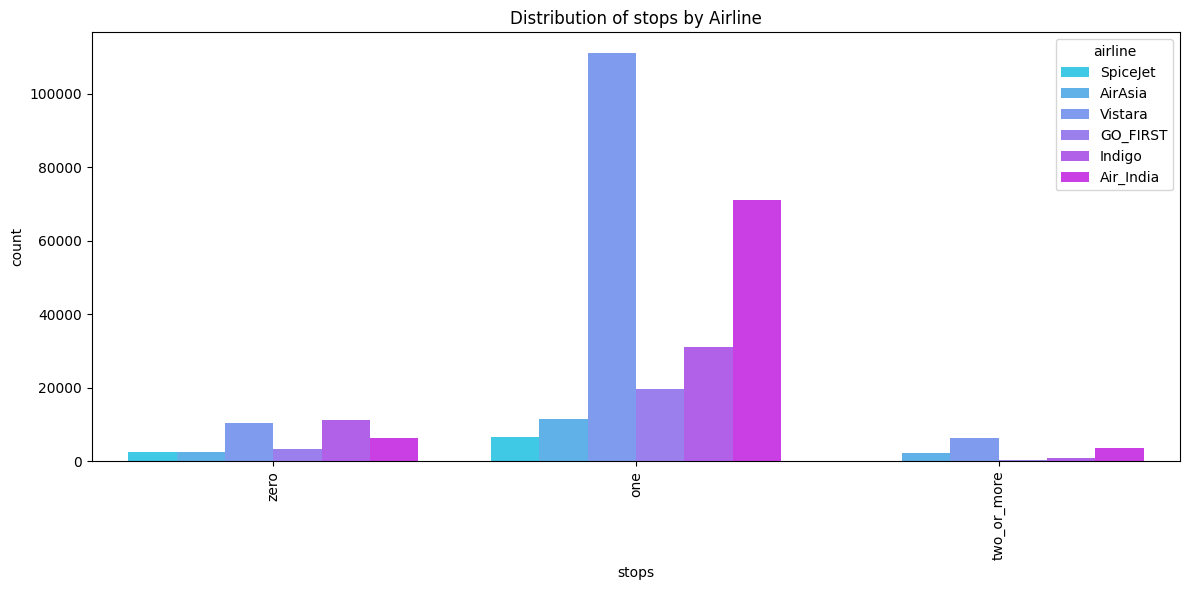

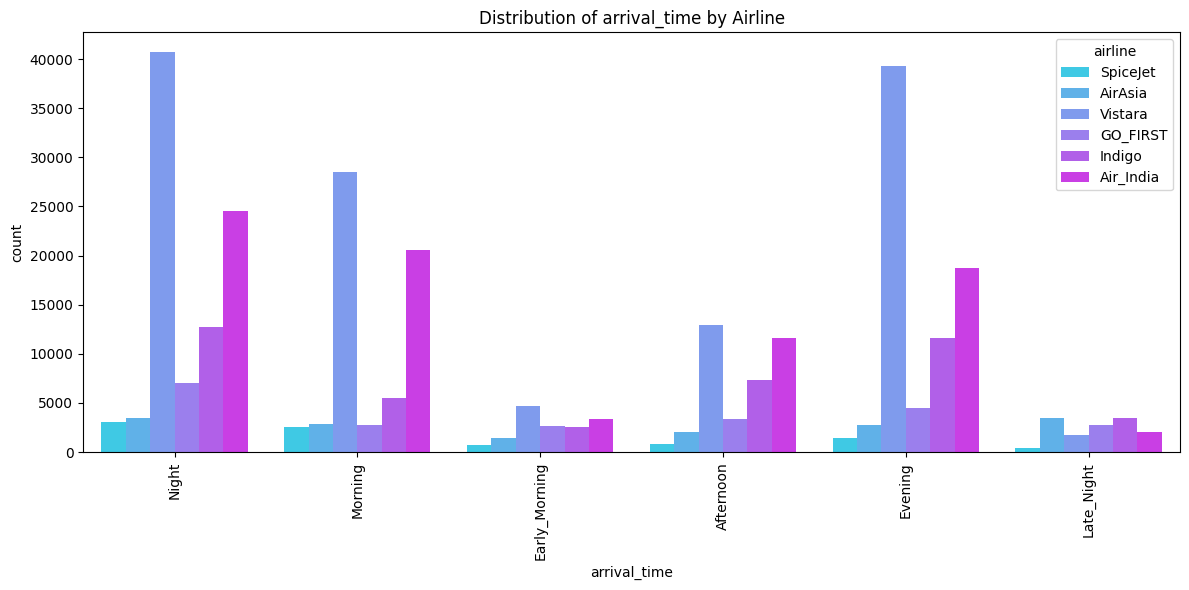

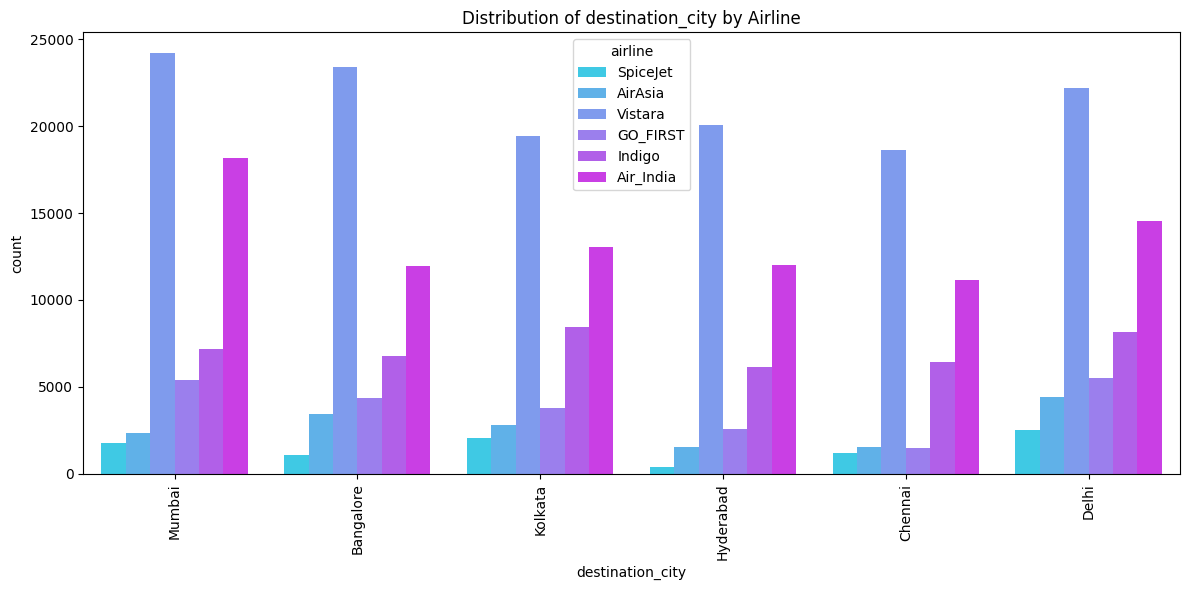

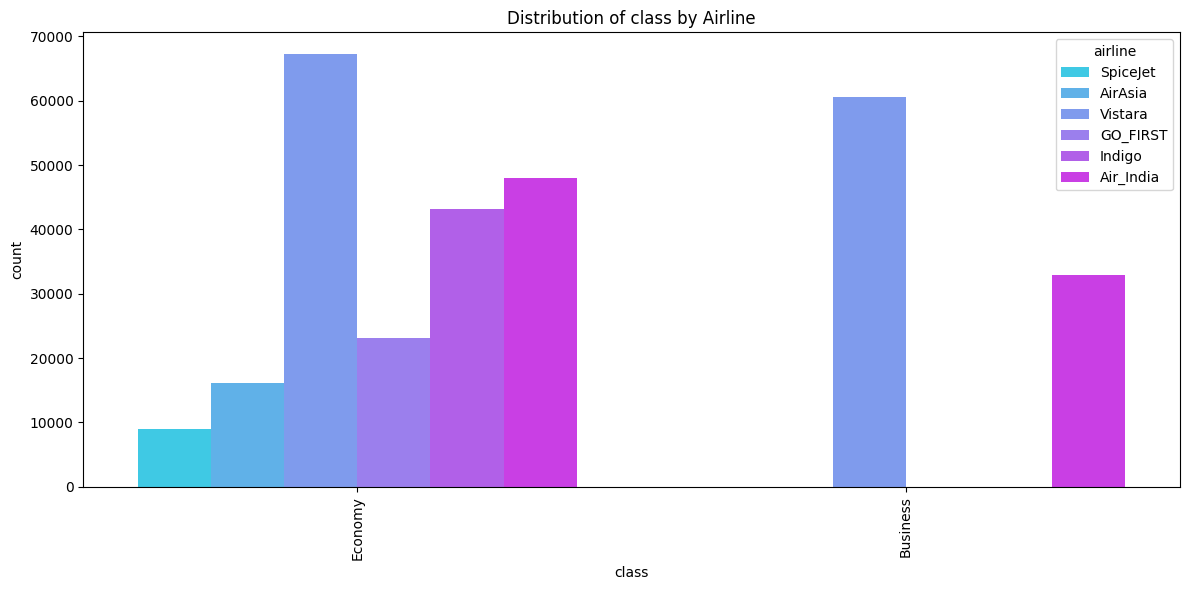

In [52]:
for col in categorical_columns[1:]:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data, x=col, hue='airline', palette='cool')
    plt.xticks(rotation=90)
    plt.title(f'Distribution of {col} by Airline')
    plt.tight_layout()
    plt.show()

🧠 Inference

* The intention is to explore how different categorical features relate to the 'airline' category.

* However, sns.pairplot() is best used with numerical
 data. It creates scatter plots for numeric features and histograms on the diagonal.

* Since most of the categorical columns (and 'airline'  itself) are likely non-numeric, the plots
 generated might either fail or not be informative.

* A better approach for categorical features would be
 using:

 * sns.countplot(): to show frequency distribution across airlines.

 * sns.boxplot() (if you want to compare categorical   columns with a numerical column like price).

 * sns.catplot(): a flexible way to handle categorical data visualization.

### Numerical columns

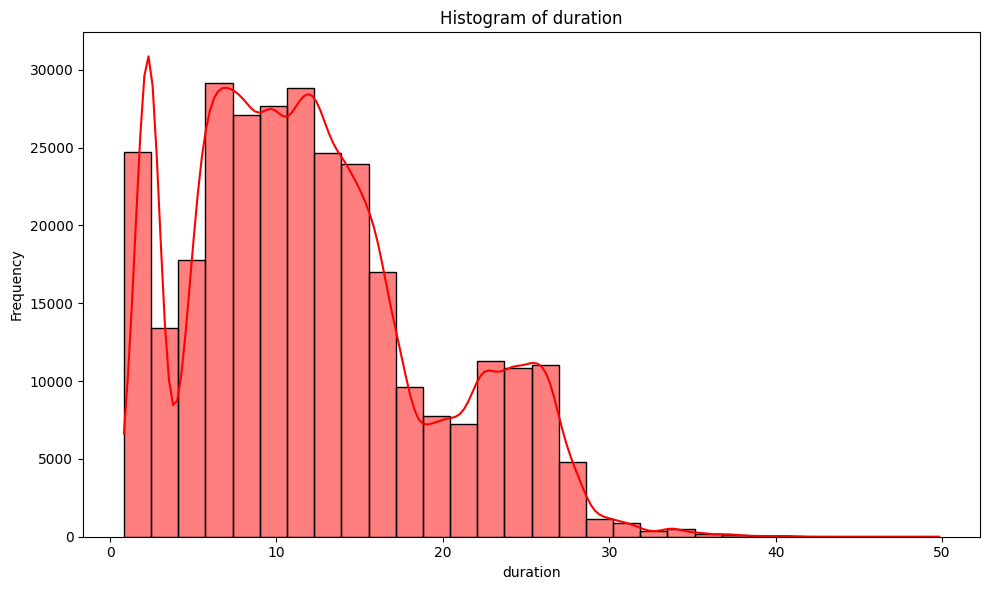

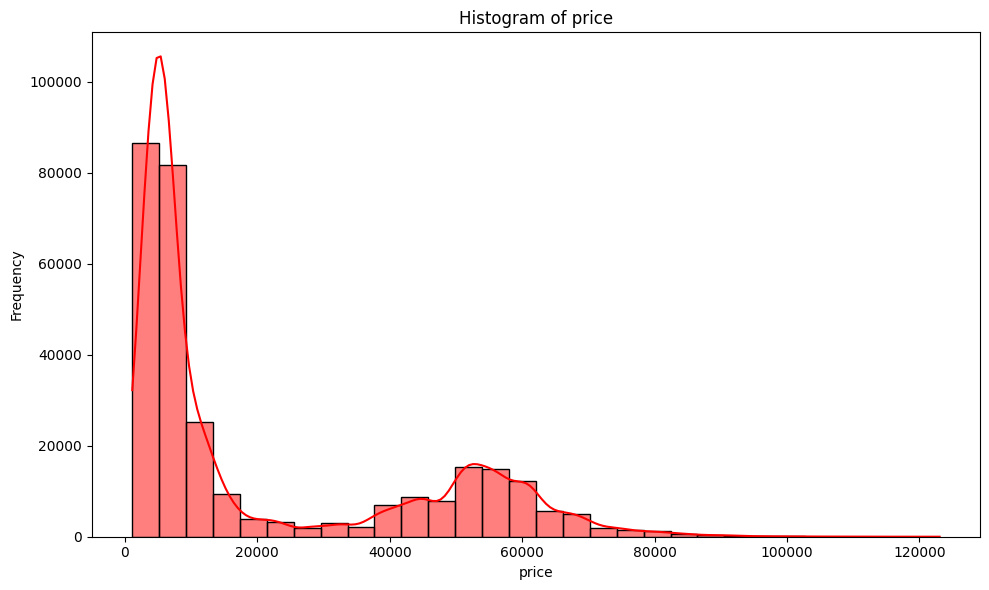

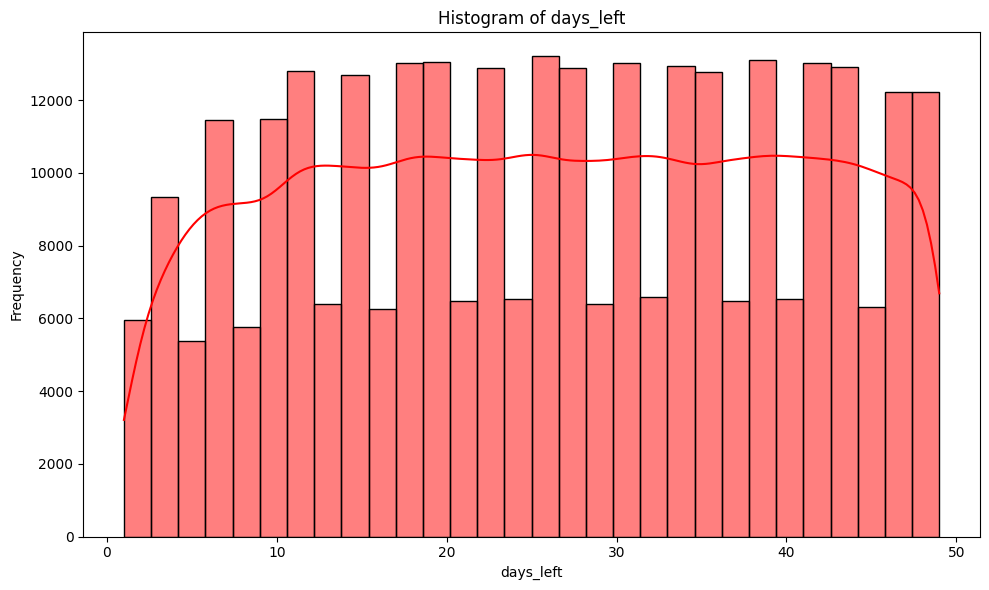

In [53]:
# Fix column names (remove spaces)
data.columns = data.columns.str.strip()

# List of numerical columns to plot
numeric_columns = ['duration', 'price', 'days_left']

# Plot each as a histogram
for col in numeric_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True, bins=30, color='red')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


📊 Inference

1. duration Histogram:

* This plot shows how flight durations are distributed.

* You might observe:

   * A peak at certain values (e.g., 2-3 hours if most flights are short-haul).

   * Whether the distribution is skewed—long tail to the right would suggest a few long-haul flights.

2. price Histogram:

* Shows how flight prices are spread across the
 dataset.

* You might observe:

  * right-skewed distribution, where most flights are cheap but a few are very expensive.

  * Multiple peaks if prices vary across airlines or time periods (like weekdays vs weekends).

3. days_left Histogram:

* Shows how many days in advance the flights were booked.

* You might observe:

  * A left-skew if most bookings are made close to the travel date.

  * A right-skew if people tend to book well in advance.

  * Peaks at specific intervals (e.g., 7, 14, or 30 days) might indicate common planning behaviors.



### Target Variable

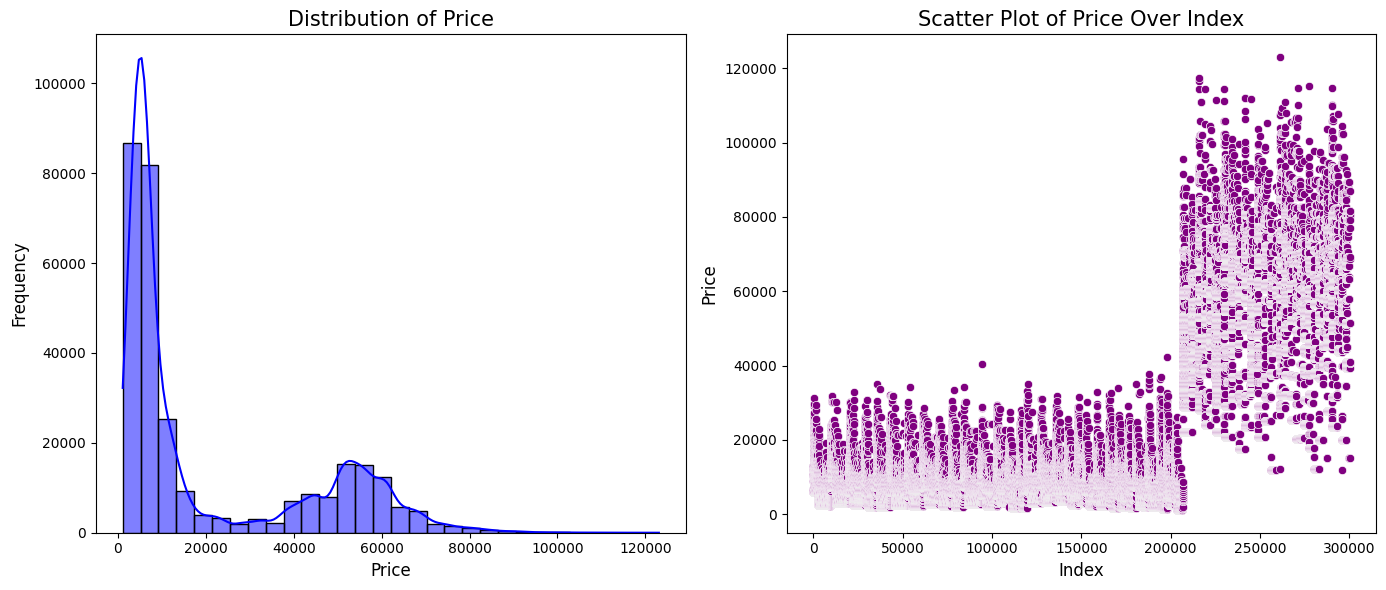

In [54]:
plt.figure(figsize=(14, 6))

# --- Left Plot: Histogram of 'price' ---
ax1 = plt.subplot(1, 2, 1)
sns.histplot(data['price'], bins=30, kde=True, color='blue', ax=ax1)  # Added KDE for smoother curve
ax1.set_title('Distribution of Price', fontsize=15)
ax1.set_xlabel('Price', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)

# --- Right Plot: Scatterplot of 'price' vs index ---
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(x=data.index, y='price', data=data, color='purple', ax=ax2)
ax2.set_title('Scatter Plot of Price Over Index', fontsize=15)
ax2.set_xlabel('Index', fontsize=12)
ax2.set_ylabel('Price', fontsize=12)

plt.tight_layout()
plt.show()



📊 Inference from Histogram and Scatter Plot of Price

🔹 Histogram (Left Plot: Distribution of Price)
The histogram shows the overall distribution of price values.

* You can observe whether the distribution is:

  * Skewed (e.g., right-skewed if most prices are low with a few high outliers),

 * Symmetric (bell-shaped, like a normal distribution
 * Or multimodal (with multiple peaks, indicating
  subgroups).

* The KDE (Kernel Density Estimate) line provides a smooth curve to understand the general shape of the distribution.

* This plot helps answer:
 "What are the common price ranges?" and "Are there any price outliers?"

🔹 Scatter Plot (Right Plot: Price Over Index)

  * This shows how price changes across the dataset
  index (which could represent time, order of entry, or another sequence).

* Patterns might indicate:

 * Trends over time (e.g., increasing or decreasing price),

* Clusters or anomalies (sudden spikes or drops),

* Seasonal effects, if the index is time-related.


#Data Cleaning

### Handling Null/ Duplicates values

In [55]:
# delecting duplicates
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
300148,False
300149,False
300150,False
300151,False


In [56]:
data.duplicated().sum()

np.int64(0)

no duplicates in  this dataset

In [57]:
data.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


no null values in this  dataset

### Encoding

In [58]:
categorical_columns=data.select_dtypes(include=['object','category']).columns.tolist()
print("categorical columns:",categorical_columns)

categorical columns: ['airline', 'flight', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


#### Ordinal Data

In [59]:
data['departure_time'].unique()

array(['Evening', 'Early_Morning', 'Morning', 'Afternoon', 'Night',
       'Late_Night'], dtype=object)

In [60]:
data['departure_time']=data['departure_time'].map({'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4,'Late_Night':5})

In [61]:
data['departure_time'].unique()

array([3, 0, 1, 2, 4, 5])

In [62]:
data['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [63]:
data['stops']=data['stops'].map({'two_or_more':0, 'one':1, 'zero':2})

In [64]:
data['stops'].unique()

array([2, 1, 0])

In [65]:
data['arrival_time'].unique()

array(['Night', 'Morning', 'Early_Morning', 'Afternoon', 'Evening',
       'Late_Night'], dtype=object)

In [66]:
data['arrival_time']=data['arrival_time'].map({'Early_Morning':0, 'Morning':1, 'Afternoon':2, 'Evening':3, 'Night':4,'Late_Night':5})

In [67]:
data['arrival_time'].unique()

array([4, 1, 0, 2, 3, 5])

In [68]:
data['class'].unique()

array(['Economy', 'Business'], dtype=object)

In [69]:
data['class']=data['class'].map({'Economy':0,'Business':1})

#### Nominal Data

In [70]:
categorical_columns=data.select_dtypes(include=['object','category']).columns.tolist()
print("categorical columns:",categorical_columns)

categorical columns: ['airline', 'flight', 'source_city', 'destination_city']


##### Target Encoding

In [71]:
data['source_city'].value_counts()

,count
source_city,
Delhi,61343
Mumbai,60896
Bangalore,52061
Kolkata,46347
Hyderabad,40806
Chennai,38700


In [72]:
data['destination_city'].value_counts()

,count
destination_city,
Mumbai,59097
Delhi,57360
Bangalore,51068
Kolkata,49534
Hyderabad,42726
Chennai,40368


In [73]:
# Example: target encode source_city column based on 'Price' column

# Create a dictionary mapping source_city to mean price
target_mean = data.groupby('source_city')['price'].mean().to_dict()

# Map the encoded values back to the original DataFrame
data['source_city_encoded'] = data['source_city'].map(target_mean)

print(data[['source_city', 'source_city_encoded']].head())

  source_city  source_city_encoded
0       Delhi         18951.326639
1       Delhi         18951.326639
2       Delhi         18951.326639
3       Delhi         18951.326639
4       Delhi         18951.326639


In [74]:
# Example: target encode destination_city column based on 'Price' column

# Create a dictionary mapping destination_city to mean price
target_mean = data.groupby('destination_city')['price'].mean().to_dict()

# Map the encoded values back to the original DataFrame
data['destination_city_encoded'] = data['destination_city'].map(target_mean)

print(data[['destination_city', 'destination_city_encoded']].head())

  destination_city  destination_city_encoded
0           Mumbai              21372.529469
1           Mumbai              21372.529469
2           Mumbai              21372.529469
3           Mumbai              21372.529469
4           Mumbai              21372.529469


##### Label Encoding

In [75]:
data['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


In [76]:
data['flight'].nunique()

1561

In [77]:
le=LabelEncoder()
# exclude the "ApplicationDate" column
for cols in data.select_dtypes("object").columns:
  data[cols]=le.fit_transform(data[cols])

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   airline                   300153 non-null  int64  
 1   flight                    300153 non-null  int64  
 2   source_city               300153 non-null  int64  
 3   departure_time            300153 non-null  int64  
 4   stops                     300153 non-null  int64  
 5   arrival_time              300153 non-null  int64  
 6   destination_city          300153 non-null  int64  
 7   class                     300153 non-null  int64  
 8   duration                  300153 non-null  float64
 9   days_left                 300153 non-null  int64  
 10  price                     300153 non-null  int64  
 11  source_city_encoded       300153 non-null  float64
 12  destination_city_encoded  300153 non-null  float64
dtypes: float64(3), int64(10)
memory usage: 29.8 

# Data Tranformation

### Skewed Data

#### Histogram

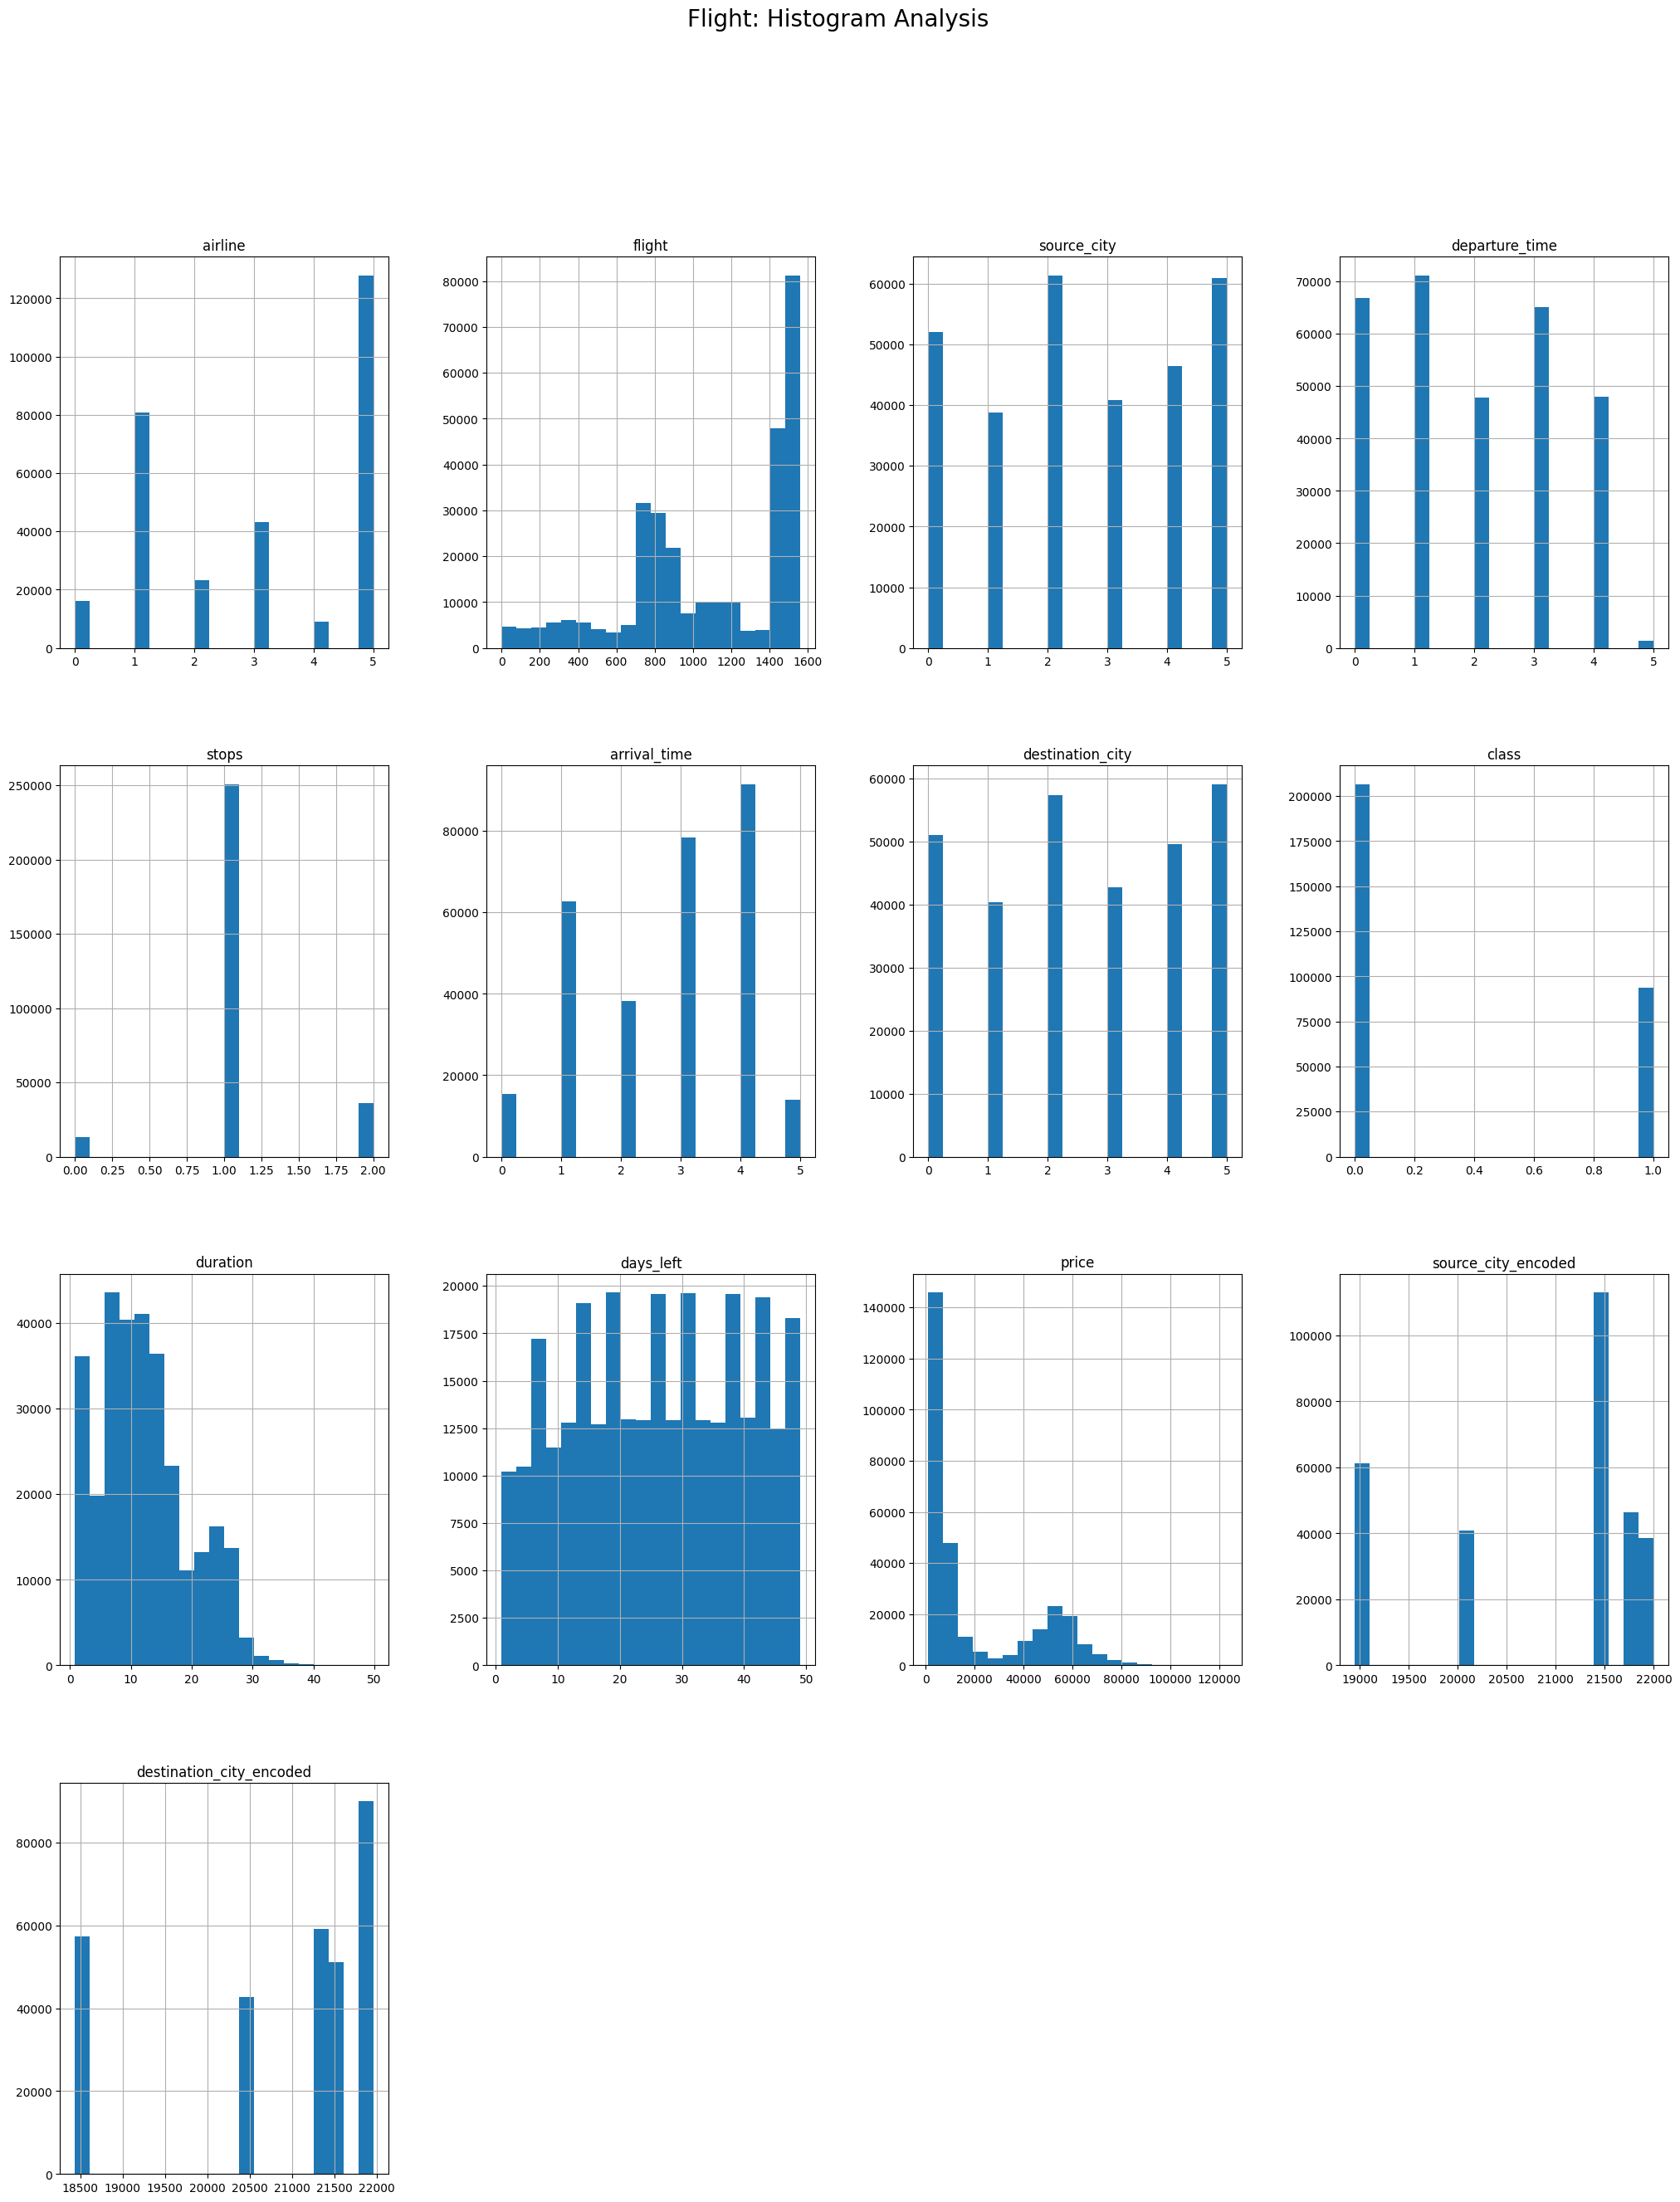

In [79]:
data.hist(bins=20,figsize=(25,30))
plt.suptitle('Flight: Histogram Analysis',fontsize=20)
plt.show()

In [80]:
# calculate skewness for each column
# Select only numeric columns for skewness calculation
numeric_data = data.select_dtypes(include=np.number)
skewness = numeric_data.skew()

# sort the skewness values in ascending order
sorted_skewness = skewness.sort_values(ascending=True)

# display the sorted skewness values
print(sorted_skewness)

destination_city_encoded   -1.125500
source_city_encoded        -0.862990
flight                     -0.600462
arrival_time               -0.337013
airline                    -0.211318
destination_city           -0.054995
days_left                  -0.035464
source_city                -0.033006
departure_time              0.138920
duration                    0.602899
stops                       0.622363
class                       0.814250
price                       1.061377
dtype: float64


In [81]:
# create a copy of the original data for comparison
data_copy=data.copy()
# log Transformation of skewed columns (eg.price)
data_copy['price']=np.log1p(data_copy['price']) # log(1+x) to handle 0 Values


The log1p function in numpy stands for log(1+x),where "1p" refers to adding 1 to the input value before taking the logarthm

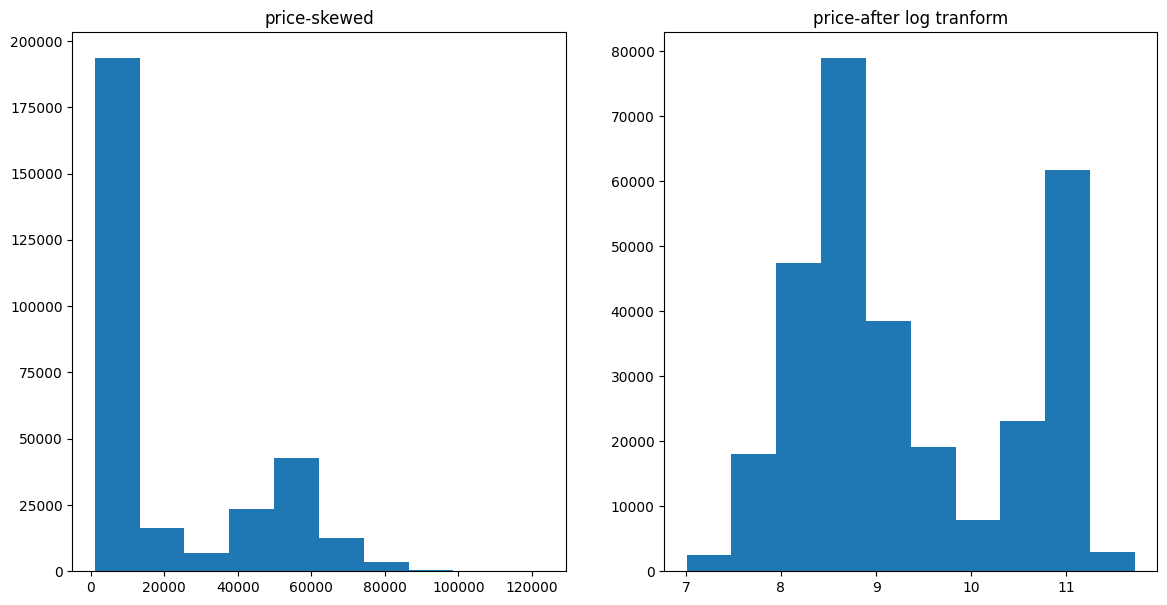

In [82]:
plt.figure(figsize=(14,7))
#
ax1=plt.subplot(1,2,1)
cp=plt.hist(data["price"])
plt.title("price-skewed")
#
ax2=plt.subplot(1,2,2)
cp=plt.hist(data_copy["price"])
plt.title("price-after log tranform")
plt.show()

In [83]:
# step 1: select numeric columns ,excluding "loanApproved"
numeric_columns=data.drop(columns=['price']).select_dtypes(include=['number'])

#step 2: calculate skewness for numeric columns
skewness=numeric_columns.skew()

#step3: identify columns with high skewness (threshold > 1 or < -1)
highly_skewned_columns=skewness[abs(skewness)>1].index

#step 4 : Apply log transformation using np.1p() for columns with high skewness
for col in highly_skewned_columns:
  #create a new columns with log-transformed values
  data[col]=np.log1p(data[col])
# check transformed columns
data.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,source_city_encoded,destination_city_encoded
0,4,1408,2,3,2,4,5,0,2.17,1,5953,18951.326639,9.969908
1,4,1387,2,0,2,1,5,0,2.33,1,5953,18951.326639,9.969908
2,0,1213,2,0,2,0,5,0,2.17,1,5956,18951.326639,9.969908
3,5,1559,2,1,2,2,5,0,2.25,1,5955,18951.326639,9.969908
4,5,1549,2,1,2,1,5,0,2.33,1,5955,18951.326639,9.969908


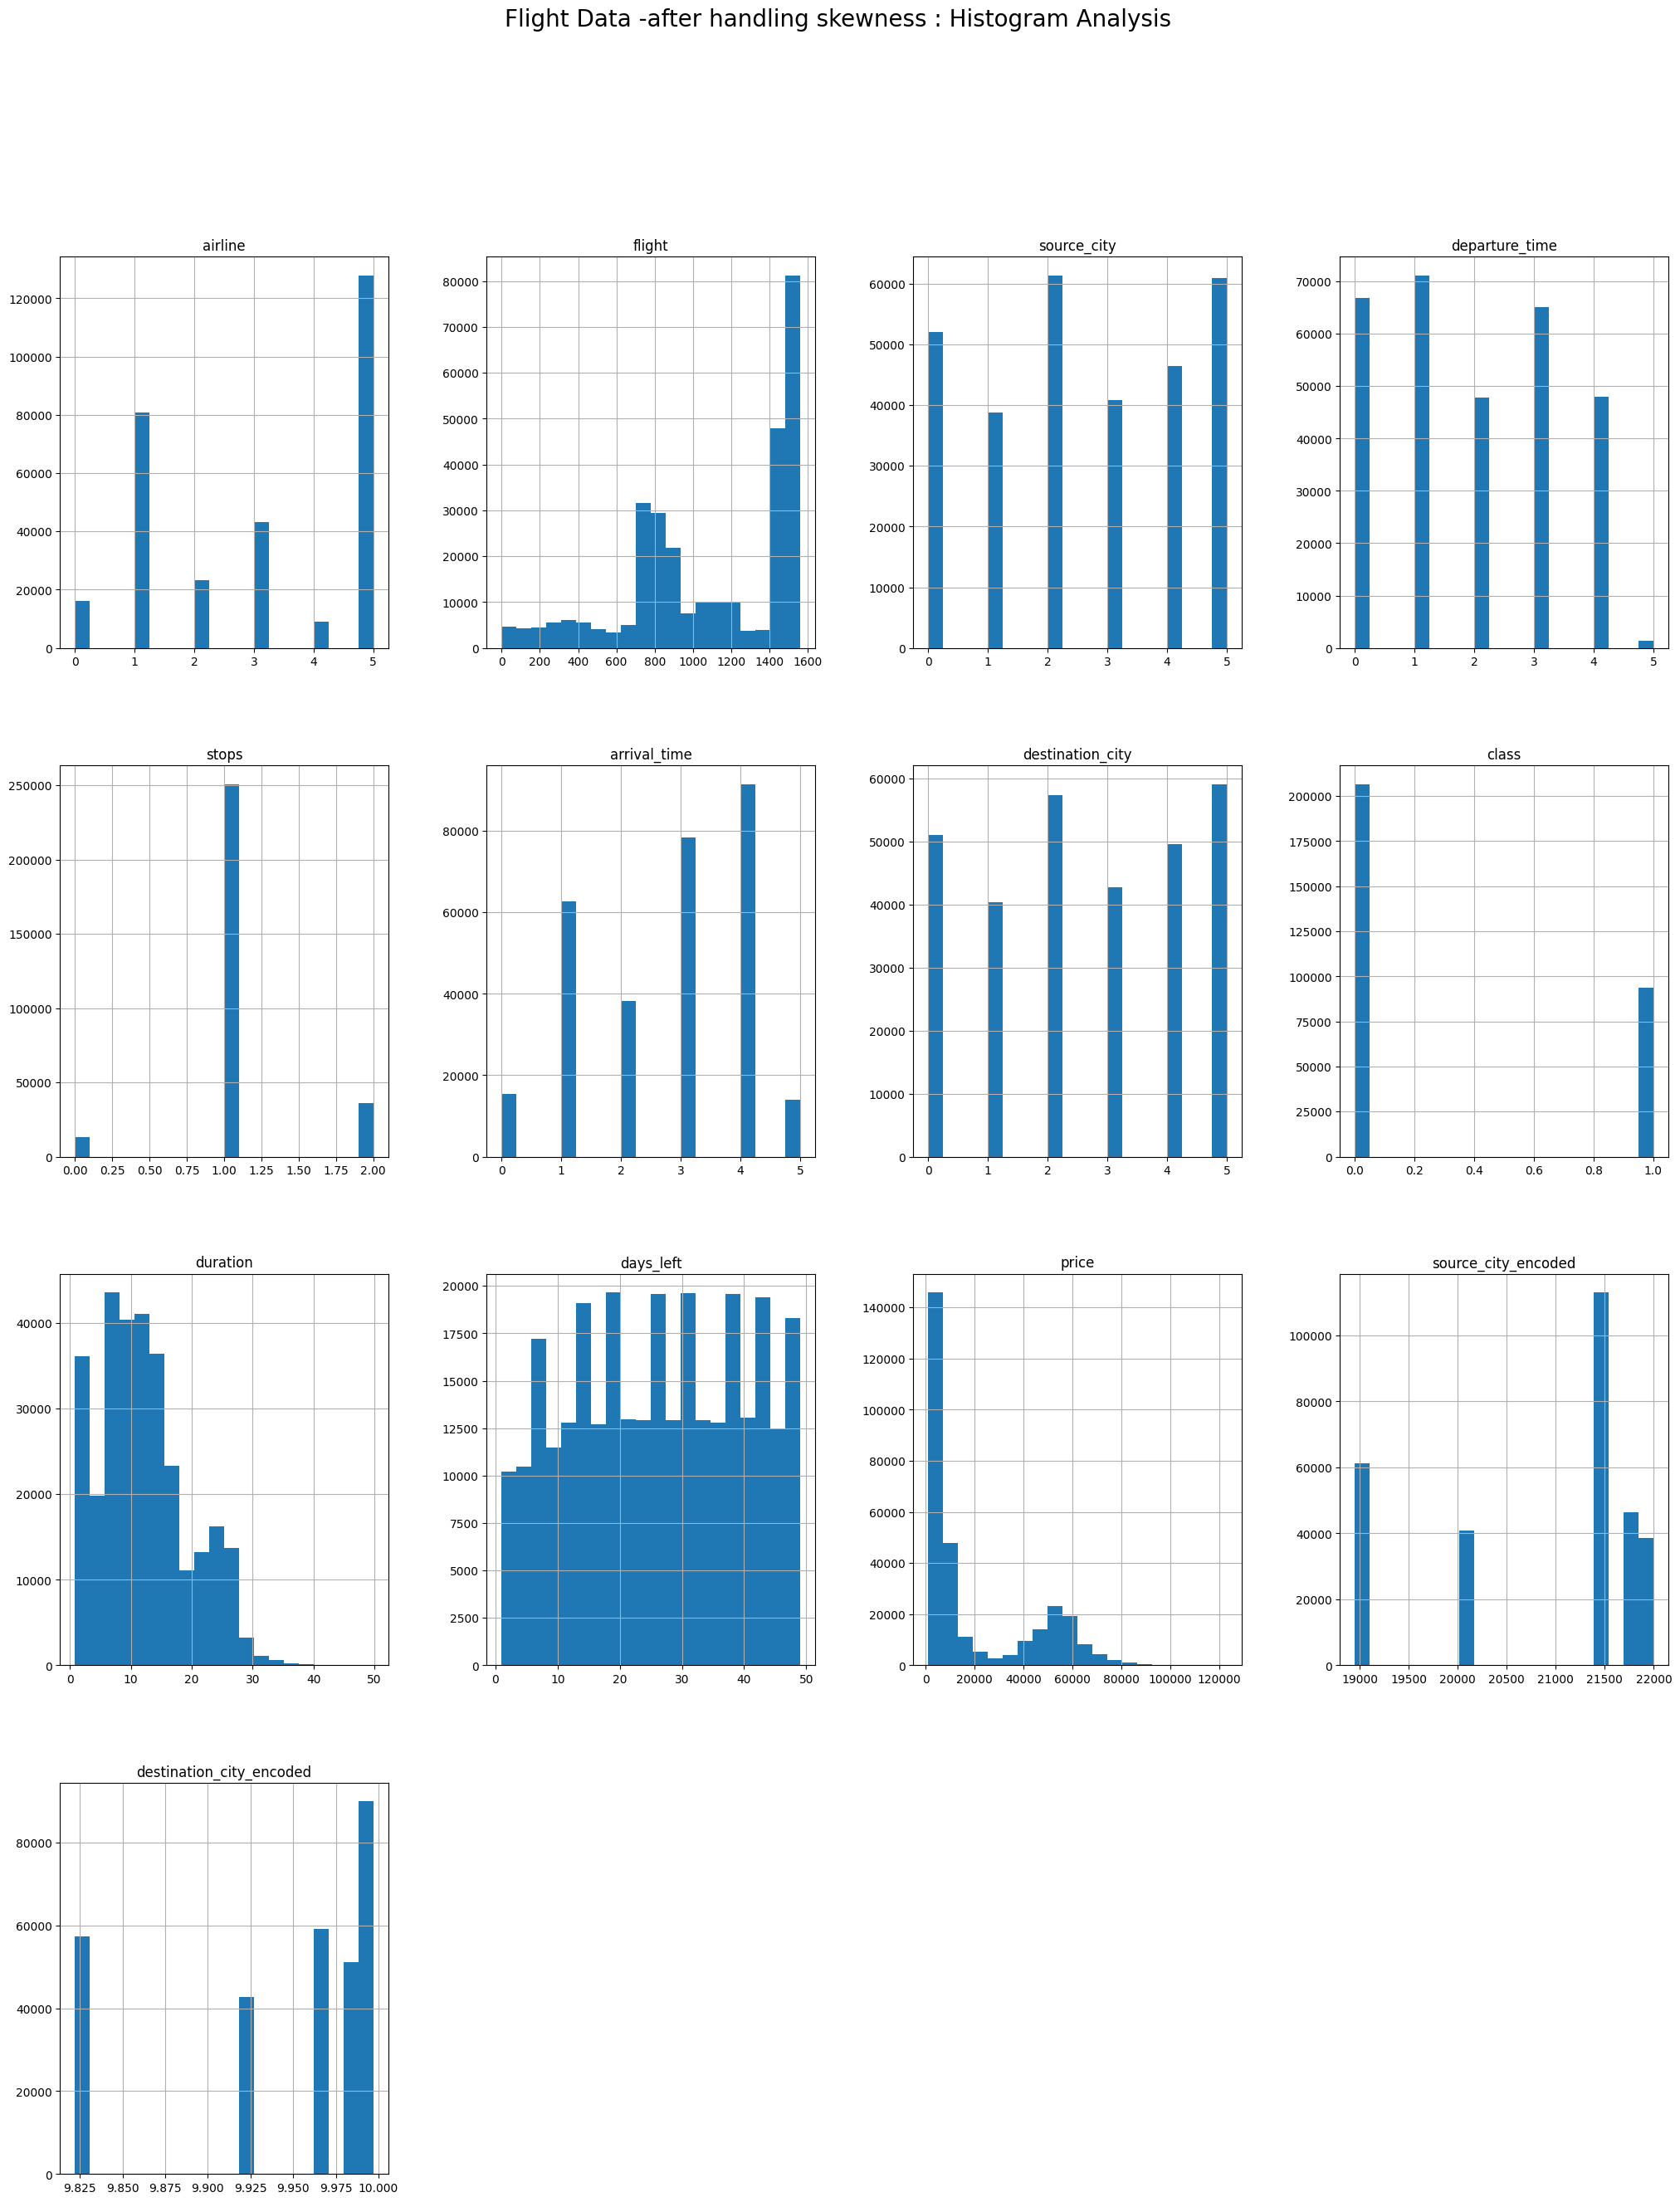

In [84]:
data.hist(bins=20,figsize=(25,30))
plt.suptitle('Flight Data -after handling skewness : Histogram Analysis',fontsize=20)
plt.show()

### Removing unwanted features

#### Based on correlation

After analyzing the correlations,you can removes

*   One among two Highly correlated features (between features
themselves).

*  Features with low correlation with the target variable


<Axes: >

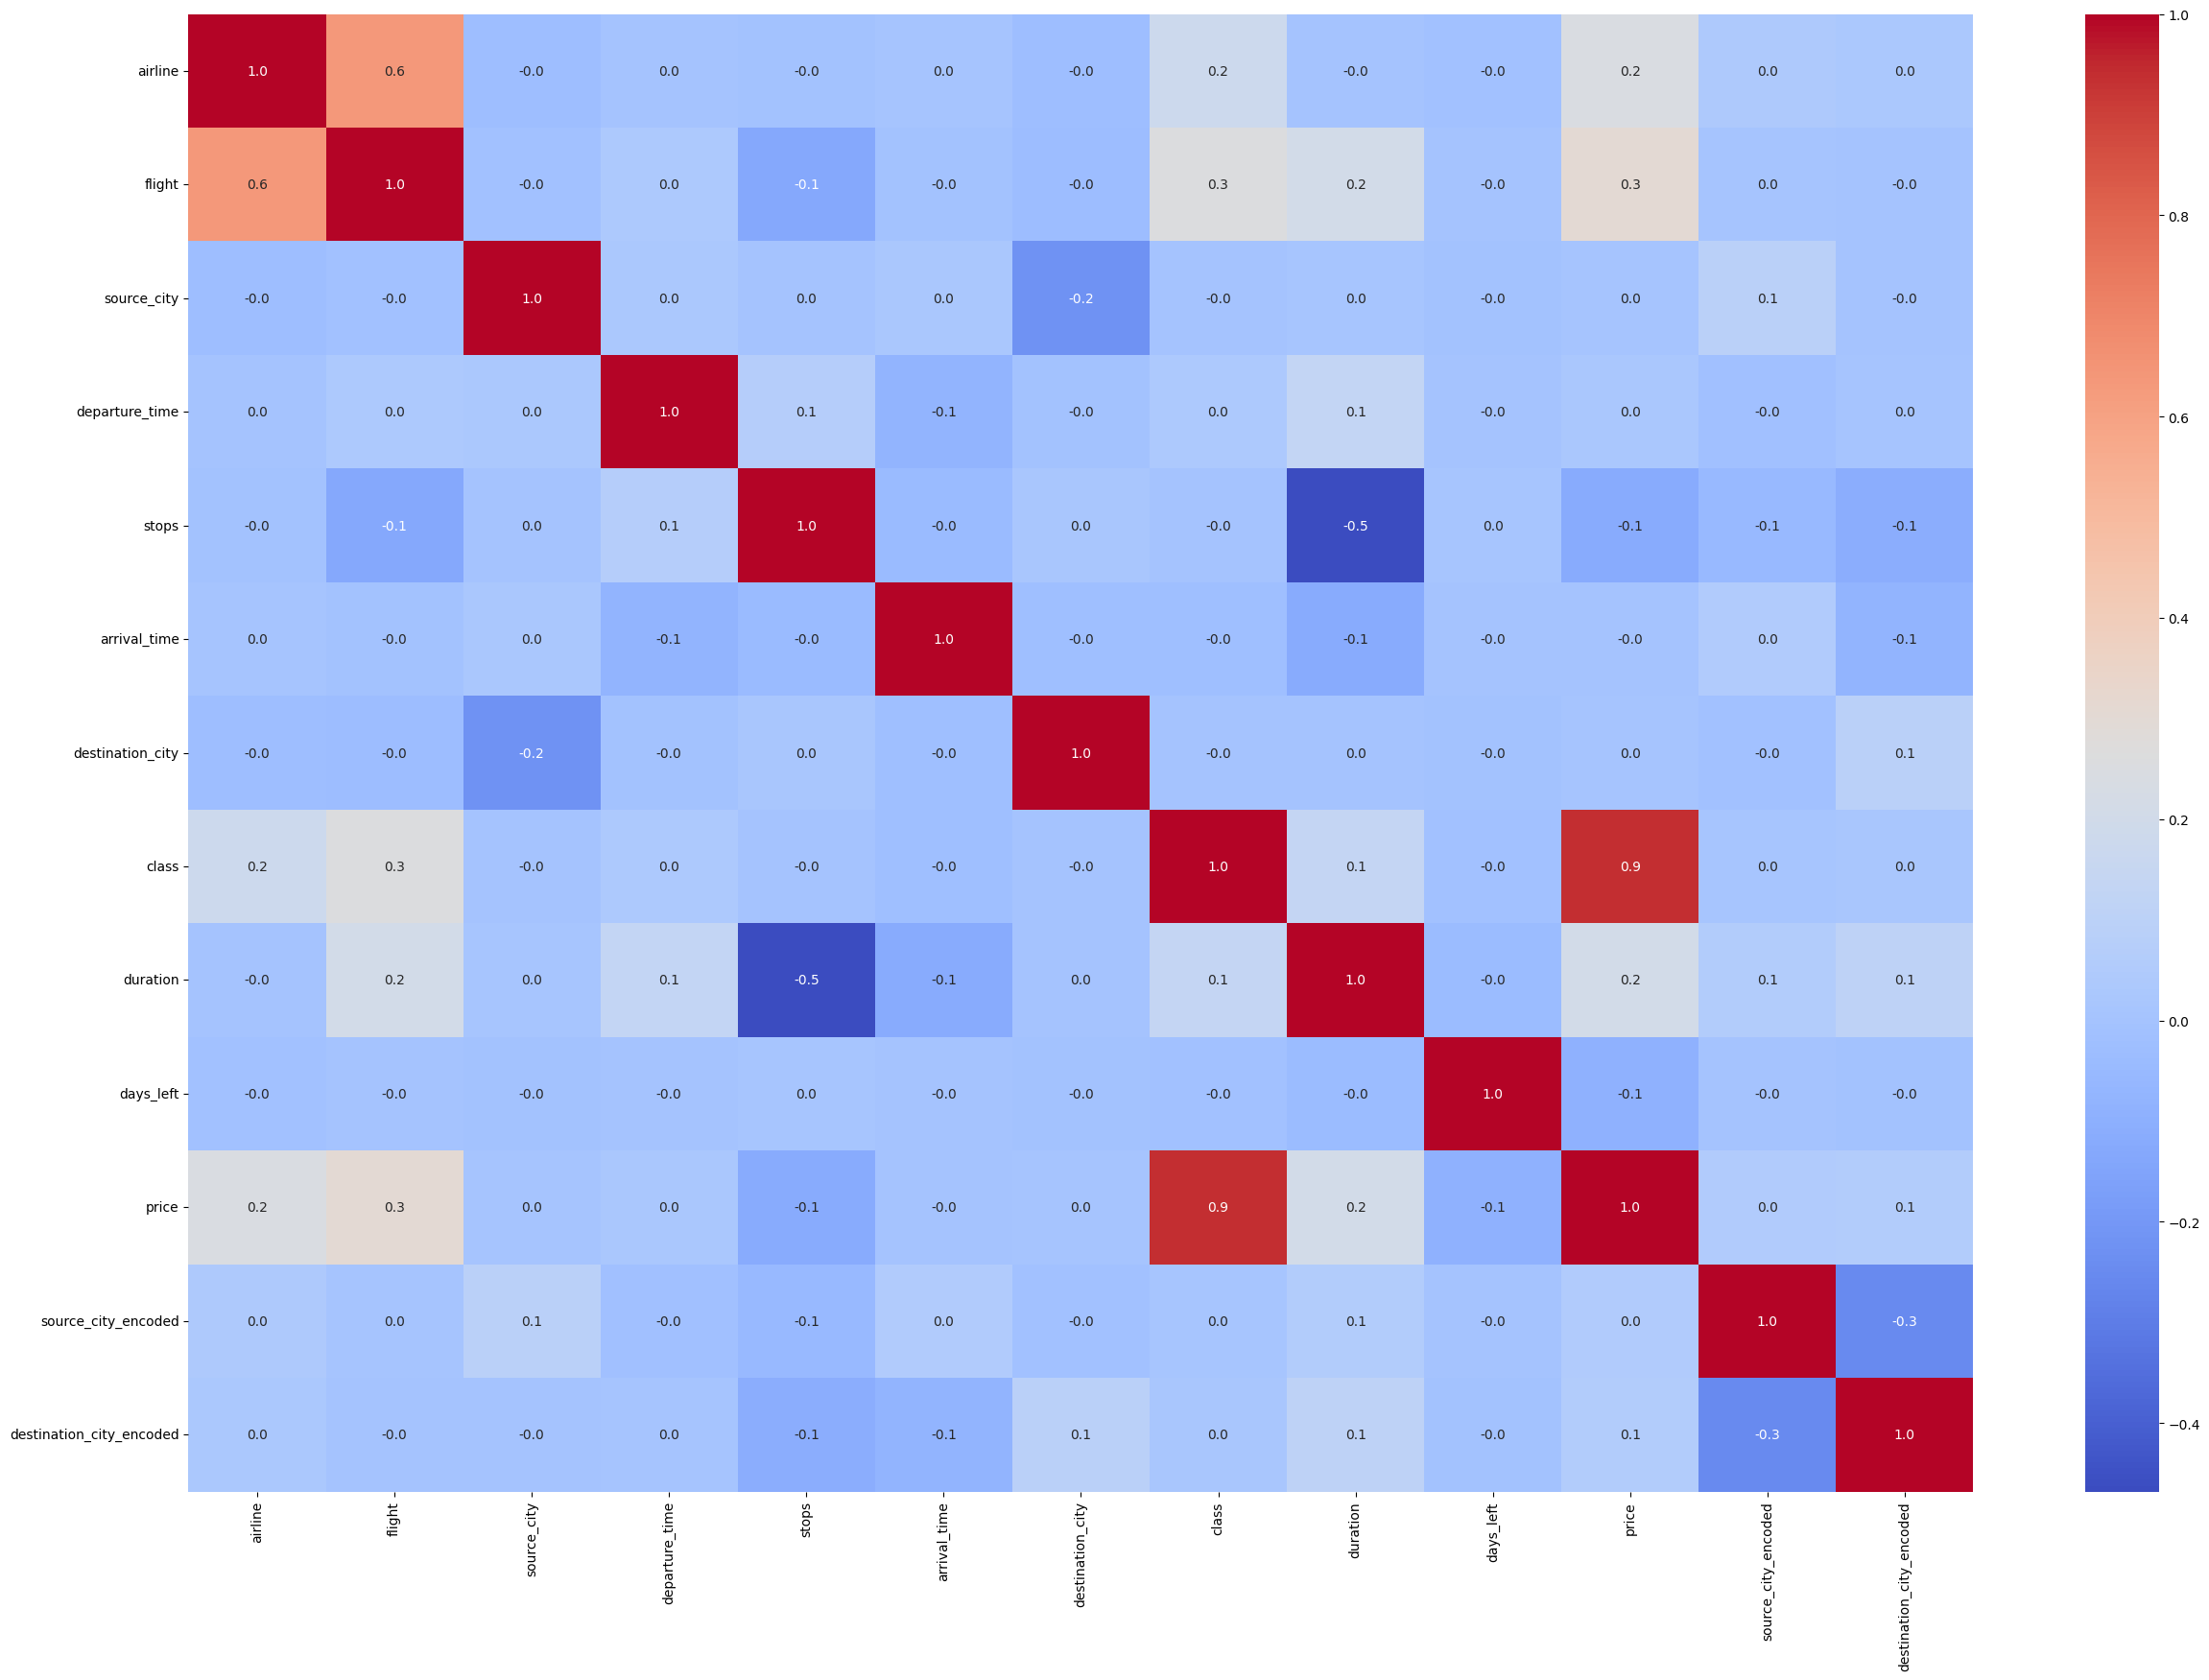

In [85]:
plt.figure(figsize=(30,20))
data.corr(numeric_only=True)
sns.heatmap(data.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='0.01f',annot_kws=None)

In [86]:
# Assuming 'flight' is the column with string values
correlation_matrix = data.drop(columns=['price']).corr(numeric_only=True)
threshold=0.5
# Find pairs of features with high correlation
highly_correlation_pairs=[]
for i in range(len(correlation_matrix.columns)):
  for j in range(i):
    # check if the absolute correlation exceeds the thrshold
    if abs(correlation_matrix.iloc[i,j]) > threshold :
      highly_correlation_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
# print all pairs of highly correlated features
print(highly_correlation_pairs)


[('flight', 'airline')]


In [87]:
data.drop(['airline'],axis=1,inplace=True)

In [88]:
data.drop(['flight'],axis=1,inplace=True)

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   source_city               300153 non-null  int64  
 1   departure_time            300153 non-null  int64  
 2   stops                     300153 non-null  int64  
 3   arrival_time              300153 non-null  int64  
 4   destination_city          300153 non-null  int64  
 5   class                     300153 non-null  int64  
 6   duration                  300153 non-null  float64
 7   days_left                 300153 non-null  int64  
 8   price                     300153 non-null  int64  
 9   source_city_encoded       300153 non-null  float64
 10  destination_city_encoded  300153 non-null  float64
dtypes: float64(3), int64(8)
memory usage: 25.2 MB


### Scaling

#### Robust Scaler

In [90]:
from sklearn.preprocessing import RobustScaler

# Selecting numerical columns to scale
num_cols = ['duration', 'days_left', 'price']
scaler = RobustScaler()

# Applying the scaler
data_scaled_df = data.copy()
data_scaled_df[num_cols] = scaler.fit_transform(data[num_cols]) # Changed 'df' to 'data'

# Display the scaled values
print(data_scaled_df[num_cols].head())

   duration  days_left     price
0 -0.972163  -1.086957 -0.039006
1 -0.955032  -1.086957 -0.039006
2 -0.972163  -1.086957 -0.038926
3 -0.963597  -1.086957 -0.038953
4 -0.955032  -1.086957 -0.038953


### Handling outlier

#### Boxplots

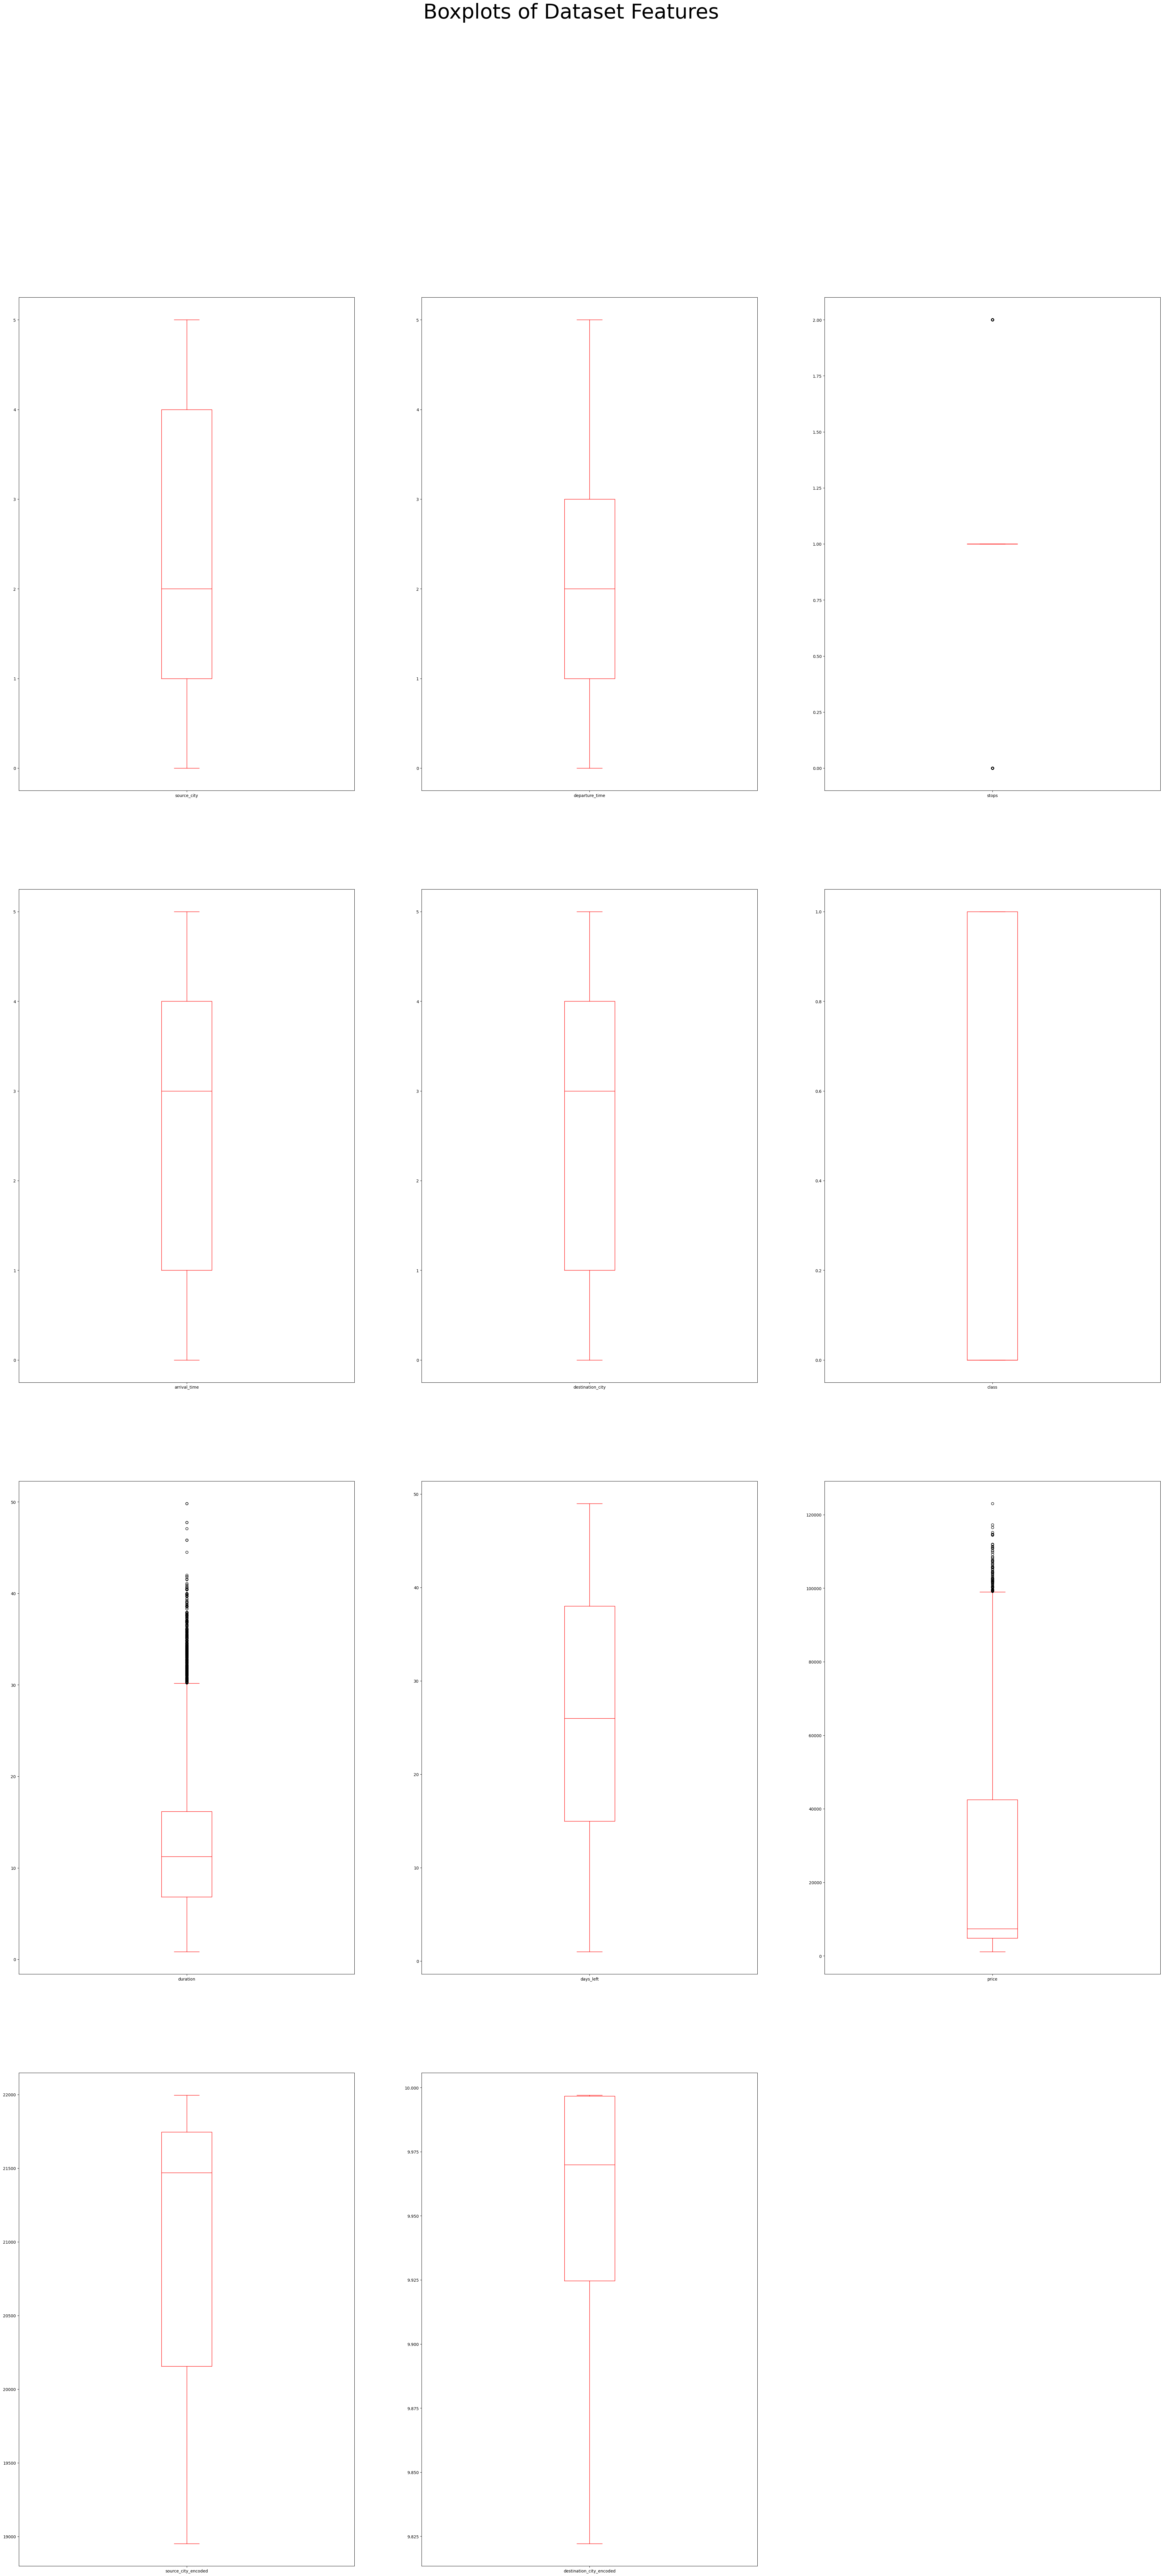

In [91]:
data.plot(kind="box",subplots=True,layout=(4,3),figsize=(50,100),color="red")
plt.suptitle("Boxplots of Dataset Features",fontsize=50)
plt.show()

In [92]:
# create a copy of the original data for comparison
data_copy=data.copy()

def remove_outliers_iqr(df,exclude_columns):
  # loop through numeric columns
  for column in df.select_dtypes(include=['number']):
    if column in exclude_columns:
      continue #skip exclude columns
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    # define outlier bounds
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    # filter out the outlier
    df=df[(df[column] >= lower_bound)&(df[column]<=upper_bound)]
  return df
# define the columns to exclude
exclude_columns=['price']
# remove outlier
data=remove_outliers_iqr(data,exclude_columns)
#print shapes of data before and after removing outliers
print("shape of data before removing outliers:",data_copy.shape)
print("shape of data after removing outliers:",data.shape)
print("Number of  outliers removed:",data_copy.shape[0]- data.shape[0])


shape of data before removing outliers: (300153, 11)
shape of data after removing outliers: (249567, 11)
Number of  outliers removed: 50586


# Model Building

##  Regression Model

In [93]:
x1=data.drop('price',axis=1)
y1=data[['price']]

In [94]:
data['price'].value_counts()

,count
price,
54608,1445
54684,1390
60978,1371
60508,1230
49725,1205
...,...
73557,1
16141,1
9892,1


In [95]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,random_state=42,test_size=0.2)
print("shape of Training Features:",x1_train.shape)
print("shape of Testing Features:",x1_test.shape)
print("shape of Training Target :",y1_train.shape)
print("shape of Testing Target :",y1_test.shape)

shape of Training Features: (199653, 10)
shape of Testing Features: (49914, 10)
shape of Training Target : (199653, 1)
shape of Testing Target : (49914, 1)


In [96]:
models={
    "Linear_Regression":LinearRegression(),
    "RandomForest_Regressor":RandomForestRegressor(),
    "GradientBoosting_Regressor":GradientBoostingRegressor(),
   "DecisionTree_Regressor":DecisionTreeRegressor()
}

In [97]:
# dictionary to store results
results={'model':[],'MSE':[],'MAE':[],'R2':[]}
# loop through the models train them and calculate the metrics
for model_name,model in models.items():
  # Train the model
  model.fit(x1_train,y1_train)
  # make prediction
  y1_pred=model.predict(x1_test)

  mse=mean_squared_error(y1_test,y1_pred)
  mae=mean_absolute_error(y1_test,y1_pred)
  r2=r2_score(y1_test,y1_pred)

  # store results in the dictionary
  results['model'].append(model_name)
  results['MSE'].append(mse)
  results['MAE'].append(mae)
  results['R2'].append(r2)

  #  converts results to a DataFrame
results_df=pd.DataFrame(results)
  # Display the results
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,model,MSE,MAE,R2
0,Linear_Regression,4.221012e+07,4208.387421,0.924727
1,RandomForest_Regressor,1.182556e+07,1488.423443,0.978912
2,GradientBoosting_Regressor,3.209415e+07,3503.335542,0.942767
3,DecisionTree_Regressor,1.841653e+07,1612.014455,0.967158


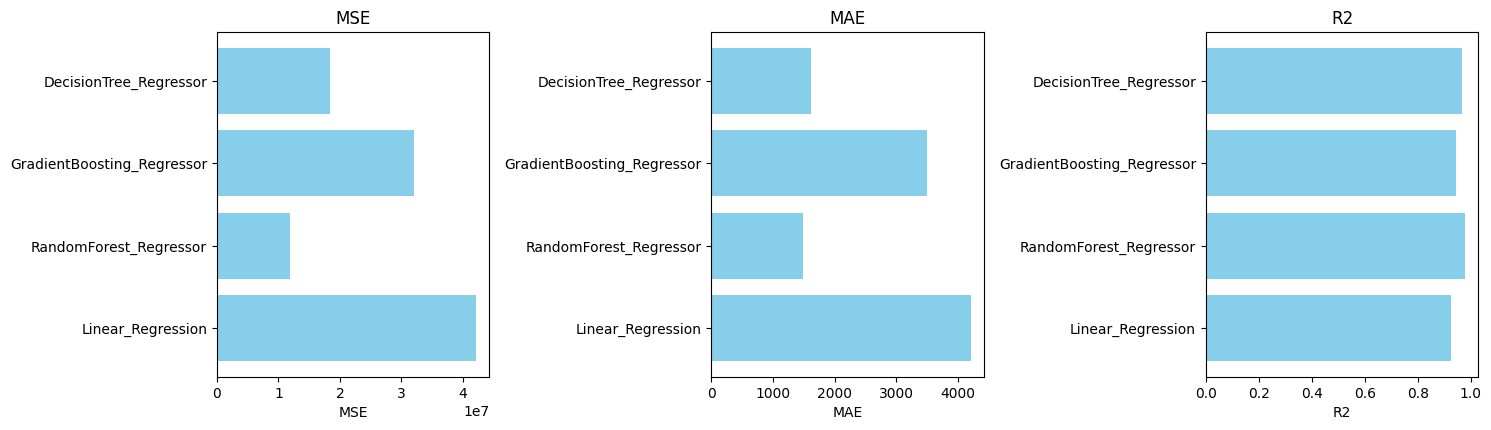

In [98]:
metrics = ['MSE', 'MAE', 'R2']

plt.figure(figsize=(15, 8))

for i, metric in enumerate(metrics):
    plt.subplot(2, 3, i + 1)
    plt.barh(results_df['model'], results_df[metric], color="skyblue")
    plt.title(metric)
    plt.xlabel(metric)

plt.tight_layout()
plt.show()


#### Regression On scaled Data

In [99]:
x1s=data_scaled_df.drop('price',axis=1)
y1s=data_scaled_df[['price']]
x1s_train,x1s_test,y1s_train,y1s_test=train_test_split(x1s,y1s,random_state=42,test_size=0.2)
# dictionary to store results
results={'model':[],'MSE':[],'MAE':[],'R2':[]}
# loop through the models train them and calculate the metrics
for model_name,model in models.items():
  # Train the model
  model.fit(x1s_train,y1s_train)
  # make prediction
  y1s_pred=model.predict(x1s_test)

  mse1=mean_squared_error(y1s_test,y1s_pred)
  mae1=mean_absolute_error(y1s_test,y1s_pred)
  r21=r2_score(y1s_test,y1s_pred)

  # store results in the dictionary
  results['model'].append(model_name)
  results['MSE'].append(mse1)
  results['MAE'].append(mae1)
  results['R2'].append(r21)

  #  converts results to a DataFrame
  results_df1=pd.DataFrame(results)
  # Display the results
  # results_df1
# sort by Accuracy
results_df1=results_df1.sort_values(by="MSE",ascending=True)
# display the sorted DataFrame with background gradient
results_df1.style.background_gradient('Greens')

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_gb.py:672: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)  # TODO: Is this still required?


,model,MSE,MAE,R2
1,RandomForest_Regressor,0.007794,0.037065,0.978467
3,DecisionTree_Regressor,0.012165,0.040226,0.966391
2,GradientBoosting_Regressor,0.020551,0.085544,0.943221
0,Linear_Regression,0.035189,0.121792,0.902781


# pickle file

In [101]:
import pickle

# save the regression model
r_model = LinearRegression()
r_model.fit(x1s_train,y1s_train.values.ravel())
with open ('Regression_model.pkl','wb') as file:
  pickle.dump(r_model, file)


✈️ **Flight Price Prediction - Final Report**

📋 **Project Overview**

* This project aimed to analyze and predict flight prices based on various features such as airline, source and destination cities, number of stops, time of departure/arrival, class, duration, and days left for booking. The final objective was to select a model that balances performance and generalization.

🧹 Data Overview

   * Total Records: 300,153

   * Features: 11 (after excluding the index column)

   * Target Variable: price

Key Features:

* Categorical: airline, flight, source_city, departure_time, stops,
 arrival_time, destination_city, class

* Numerical: duration, days_left, price

📊 **Exploratory Data Analysis (EDA) Insights**

* Airlines and classes significantly influence flight prices.

* Early booking generally leads to lower prices.

* Non-stop flights tend to cost more.

* Duration affects price, but with some airline-specific patterns.

* No missing values or major outliers in the dataset.

🤖 **Model Evaluation**

Four regression models were evaluated using Mean Squared Error (MSE), Mean Absolute Error (MAE), and R² score. The models are

 * RandomForest Regressor
 * DecisionTree Regressor
 * GradientBoosting Regressor
 * Linear Regression

✅ **Final Model Selection**

  Although ensemble models (Random Forest, Gradient Boosting) provided better accuracy, they showed signs of overfitting with extremely high R² scores. Therefore, Linear Regression was chosen as the final model for its:


  * Simplicity and interpretability

  * Better generalization

  * Reasonable performance with an R² of 0.9028
